In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = "/content/gdrive/My Drive/Data/"
#export.to_csv(os.path.join(path,'files.csv'),index=False,header=True)
import time
import matplotlib.pyplot as plt
%matplotlib inline
import librosa as lr
from glob import glob
import pandas as pd
import numpy as np
import IPython.display as ipd
#audio,sfreq=lr.load(path,sr=None)
import librosa.display
import os
import cv2

<b> Import data with File path and lenght of each file</b>

In [0]:
data_df = pd.read_csv(path+'cnn.csv')
data_df=data_df.set_index('index')

data_df.head(3)

,lengthoffile
index,
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-01-01-01.wav,3.303292
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-01-02-01.wav,3.336667
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-02-01-01.wav,3.269917


<b><h3> Create labels from file encoding</h3></b>


<b> The Encoding of the files are as follows <a href="https://zenodo.org/record/1188976#.XSF23-hKiM9">RAVDESS</a></b>

   <li>Modality (01 = full-AV, 02 = video-only, 03 = audio-only).</li>
    <li>Vocal channel (01 = speech, 02 = song).</li>
    <li>Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).</li>
    <li>Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the ‘neutral’ emotion.</li>
    <li>Statement (01 = “Kids are talking by the door”, 02 = “Dogs are sitting by the door”).</li>
    <li>Repetition (01 = 1st repetition, 02 = 2nd repetition).</li>
    <li>Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).</li>



<b>Filename example: 02-01-06-01-02-01-12.mp4</b>

<li>Video-only (02)
Speech (01)
Fearful (06)
Normal intensity (01)
Statement "dogs" (02)
1st Repetition (01)
12th Actor (12)
Female, as the actor ID number is even.</li>


<b> Some common Sound related terms</b>

<b>Audio Frame</b>
<li>An audio frame, or sample, contains amplitude (loudness) information at that particular point in time. To produce sound, tens of thousands of frames are played in sequence to produce frequencies.</li>
<b>Bit Rate</b>

<li> refers to the audio quality of the stream. It is measured in Kilobitspersec(kbps or k). Bit rate is no of bits (data) encoded per second or the no. of bits transmitted or received per second. Higher the bit rate with more sampling rate, requires high bandwidth and produces good audio quality.<li>
  
  
  
<b>Sampling Rate </b>
<li>Sampling rate (sometimes called sampling frequency or Fs) is the number of data points acquired per second. 


 

A sampling rate of 2000 samples/second means that 2000 discrete data points are acquired every second.  This can be referred to as 2000 Hertz sample frequency</li>


In [0]:
### Empty list
### Loop over each file path in Data_df dataframe
for file_path in data_df.index:
#data=mfcc_extract(file_path)### call mfcc extract to return mfcc coeffcients and data
  data_df.at[file_path,'Actor_Gender_code'] = file_path[38:40]### Extract Actor Gender from file name using defined Encoding
  data_df.at[file_path,'Emotion_code']=file_path[47:49] #### Extract Emotion code from file name using defined encoding
  data_df.at[file_path,'Emotional_intensity_code']=file_path[50:52] #### Extract Emotional Intensity code using identified encoding
  
merged_df  = data_df
### Create Male female from gender code , odd is male and even is female
merged_df["Gender_label"] = list(map(lambda x: 'Male' if int(x)%2==1 else 'Female',merged_df.Actor_Gender_code))

### Emotion label for various classes 
merged_df['Emotion_label']=merged_df.Emotion_code.map({'01':'neutral','02':'calm','03':'happy','04':'sad','05':'angry','06':'fearful','07':'disgust','08':'surprised'})
### Emotional Intensity normal or strong
merged_df['Intensity_label']=merged_df.Emotional_intensity_code.map({'01':'normal','02':'strong'})


In [0]:
merged_df['emotion_gender']=merged_df['Gender_label']+"_"+merged_df['Emotion_label']
merged_df.head(3)

,lengthoffile,Actor_Gender_code,Emotion_code,Emotional_intensity_code,Gender_label,Emotion_label,Intensity_label,emotion_gender
index,,,,,,,,
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-01-01-01.wav,3.303292,01,01,01,Male,neutral,normal,Male_neutral
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-01-02-01.wav,3.336667,01,01,01,Male,neutral,normal,Male_neutral
/content/gdrive/My Drive/sounds/Actor_01/03-01-01-01-02-01-01.wav,3.269917,01,01,01,Male,neutral,normal,Male_neutral


<b> Create Sample for Test </b>

In [0]:
unique = list(merged_df['emotion_gender'].unique())
sample_emotion_data_bygender={}
for emotion in unique:
  sample_emotion_data_bygender[emotion] = merged_df[merged_df['emotion_gender']==emotion].index[0]

  
sample_emotion_data_bygender  
  

{'Female_angry': '/content/gdrive/My Drive/sounds/Actor_02/03-01-05-01-01-01-02.wav',
 'Female_calm': '/content/gdrive/My Drive/sounds/Actor_02/03-01-02-01-01-01-02.wav',
 'Female_disgust': '/content/gdrive/My Drive/sounds/Actor_02/03-01-07-01-02-01-02.wav',
 'Female_fearful': '/content/gdrive/My Drive/sounds/Actor_02/03-01-06-01-02-02-02.wav',
 'Female_happy': '/content/gdrive/My Drive/sounds/Actor_02/03-01-03-01-01-01-02.wav',
 'Female_neutral': '/content/gdrive/My Drive/sounds/Actor_02/03-01-01-01-01-01-02.wav',
 'Female_sad': '/content/gdrive/My Drive/sounds/Actor_02/03-01-04-01-01-02-02.wav',
 'Female_surprised': '/content/gdrive/My Drive/sounds/Actor_02/03-01-08-01-01-01-02.wav',
 'Male_angry': '/content/gdrive/My Drive/sounds/Actor_01/03-01-05-01-01-01-01.wav',
 'Male_calm': '/content/gdrive/My Drive/sounds/Actor_01/03-01-02-01-01-01-01.wav',
 'Male_disgust': '/content/gdrive/My Drive/sounds/Actor_01/03-01-07-01-01-02-01.wav',
 'Male_fearful': '/content/gdrive/My Drive/sounds/Ac

<b> Create Functions for plotting and extraction of MFCC</b>

In [0]:
def wav_plots(file,title='file name'):
  audio,sfreq = audio_data(file)
  plt.figure(figsize=(12,4))
  librosa.display.waveplot(audio,sr=sfreq)
  plt.title(title)
  return plt.show()

def audio_data(file):
  audio,sfreq = lr.load(file,sr=None,offset=0.5, duration=3.0)
  return audio,sfreq

def spec_plot(file,title='data category'):
  librosa.display.specshow(librosa.power_to_db(mfcc_extract(file), ref=np.max))
  plt.title(title)
  plt.show()
  
def mfcc_extract(file):
  audio,sfreq = audio_data(file)
  mfccs = librosa.feature.melspectrogram(audio, sr=sfreq)
  return mfccs

<b> Plot sample spectogram data for each label which we are going to feed it to our CNN</b>

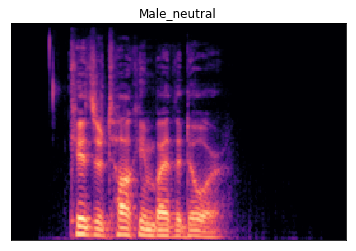

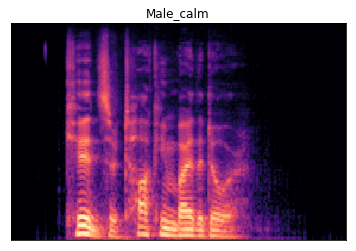

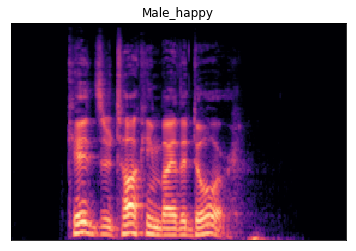

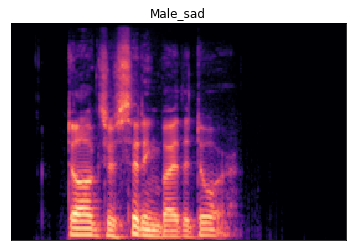

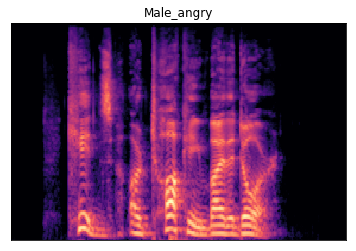

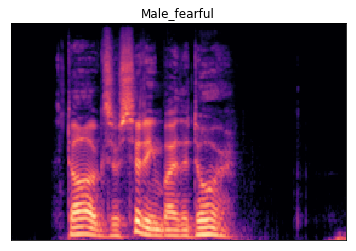

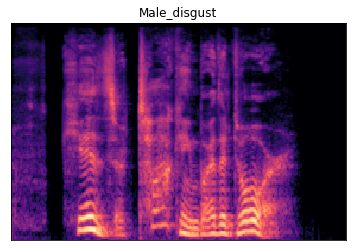

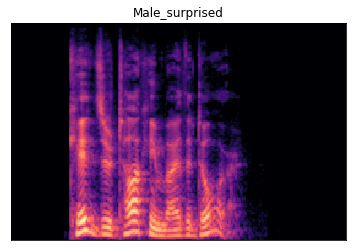

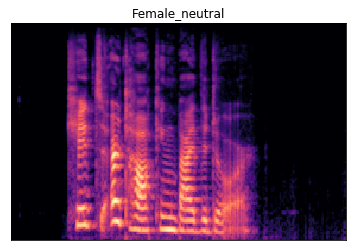

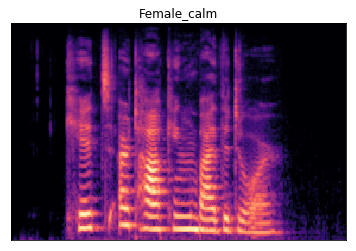

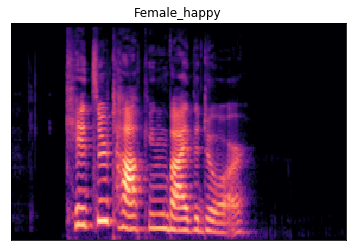

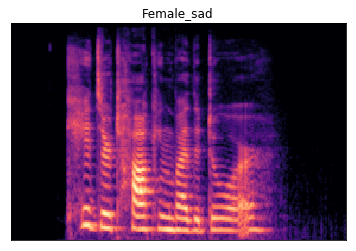

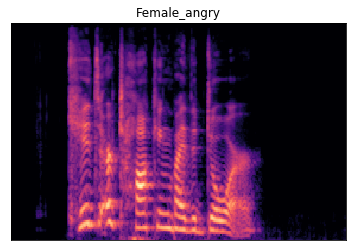

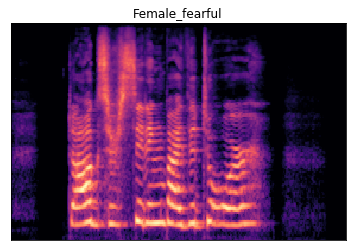

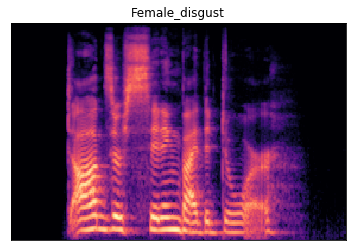

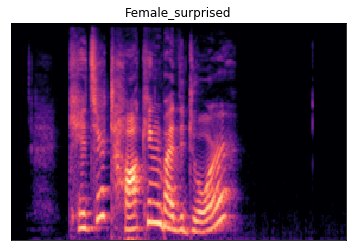

In [0]:
for label,path in sample_emotion_data_bygender.items():
  #mfcc = mfcc_extract(path)
  spec_plot(path,title=label)
  

In [0]:
from sklearn.model_selection import train_test_split

from  sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns

<b> Split data set into Train and test</b>

In [0]:
merged_df['file_path']=merged_df.index
x=merged_df.file_path.values
y = merged_df['Emotion_label'].values
train_x,test_x,train_y,test_y = train_test_split(x,y,shuffle=True,stratify=y)

<b> Plot distribution in training set</b>

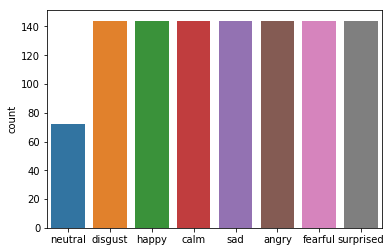

In [0]:
_=sns.countplot(train_y)

<b> Create Function which will take each audio file, plot the spectorgram, save the file as jpg , and then reimport the file and read as an array while resizing it </b>

In [0]:
img_path_train = '/content/gdrive/My Drive/imgs/'   ### Path where all .jpg files will be stored and Read 
img_path_test = '/content/gdrive/My Drive/img_test/'
#c=0
def convert_img(files,path):
  """ x =  list of arrays of each file
      y = list of labels
  
  """
  c=0
  x,y = [],[]
  for f,label_emo in files.items():## Each file read and create plots for it
    c+=1
    fig, ax = plt.subplots(1,1,figsize=[0.72,0.72])
    ax = librosa.display.specshow(librosa.power_to_db(mfcc_extract(f), ref=np.max))
    fig.savefig(path+label_emo+str(c)+".jpg" ,bbox_inches='tight',pad_inches=0)   # save the figure to file
    plt.close(fig)
    
    #### Read file after saving the plot and resize it
    WIDTH = 64
    HEIGHT = 64
    full_size_image = cv2.imread(path+label_emo+str(c)+".jpg")
    x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
    y.append(label_emo)
  return x,y

<b> Process Training data  using the above function first i create a dictionary of labels and files and pass it to the function </b>

In [0]:
zipbObj_train = zip(train_x, train_y)
 
# Create a dictionary from zip object
dictOffiles = dict(zipbObj_train)
x_train,y_train = convert_img(dictOffiles,img_path_train)

<b> convert the training data into array and encode the training labels</b>

In [0]:
x_train = np.array(x_train)  ### convert list of arrays to one array
le = LabelEncoder().fit(y_train)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
y_train = le.transform(y)
 

<b> check shape for final training set and mapping of labels</b>

In [0]:

print(f'shape of training data{x_train.shape}')
print("mapping of labels")
print(le_name_mapping)

shape of training data(1080, 64, 64, 3)
mapping of labels
{'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}


<b> we can see the shape of the array is (1080, 64,64,3) which are  batch size, height, width and channels respectively,</b>
<li><b> now we do the same for test data<b></li>

In [0]:
zipbObj_test = zip(test_x, test_y)
 
# Create a dictionary from zip object
dictOffiles_test = dict(zipbObj_test)
x_test,y_test = convert_img(dictOffiles_test,img_path_test)
x_test = np.array(x_test)
y_test = le.transform(y_test)

In [0]:
print(f'shape of training data{x_test.shape}')
print("mapping of labels")
print(le_name_mapping)

shape of training data(360, 64, 64, 3)
mapping of labels
{'angry': 0, 'calm': 1, 'disgust': 2, 'fearful': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprised': 7}


<b> Creating the  CNN </b>

In [0]:
from keras.utils import np_utils
y_train_ht = np_utils.to_categorical(y_train)
y_test_ht = np_utils.to_categorical(y_test)

In [0]:
from keras import layers
from keras import models



In [0]:
#from keras_preprocessing.image import ImageDataGenerator

#train_gen= ImageDataGenerator(rescale=1/.255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

#val_gen= ImageDataGenerator(rescale=1/.255)

In [0]:
#train_generator= train_gen.flow(x_train,y_train_ht,batch_size=30)
#val_generator = val_gen.flow(x_test,y_test_ht)
#model_history = model.fit_generator(train_generator,steps_per_epoch=36,epochs=60,validation_data=val_generator,validation_steps=36)

In [0]:
#model_history = model.fit_generator(train_generator,steps_per_epoch=36,epochs=60,validation_data=val_generator,validation_steps=36)





*   filter size 32 This is the size of the output dimension (i.e. the number of output filters in the convolution
*   input shape 64,64,3 (the dimensions of each file resized)


*   MaxPool2D layer. Its function is to reduce the spatial size of the incoming features and therefore helps reduce the amount of parameters and computation in the network, thereby helping to reduce overfitting.
*   Flatten layer. A conv2D layers extract and learn spatial features which is then passed to a dense layer after it has been flattened. This is the work of the flatten layer.


*   Dropout layer with value 0.5. Dropout randomly drops some layers in a neural networks and then learns with the reduced network. This way, the network learns to be independent and not reliable on a single layer.0.5 means to randomly drop half of the layers.




In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu',
                        input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.summary()

model.compile(loss="categorical_crossentropy",optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])


#model.compile(optimizers.rmsprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 4, 4, 128)         147584    
__________

In [0]:
cnnhistory=model.fit(x_train, y_train_ht, batch_size=36, epochs=200, validation_data=(x_test, y_test_ht))

Train on 1080 samples, validate on 360 samples
Epoch 1/200
1080/1080 [==============================] - 1s 1ms/step - loss: 11.8913 - acc: 0.1306 - val_loss: 7.2523 - val_acc: 0.1944
Epoch 2/200
1080/1080 [==============================] - 0s 285us/step - loss: 11.7043 - acc: 0.1250 - val_loss: 7.0860 - val_acc: 0.1778
Epoch 3/200
1080/1080 [==============================] - 0s 272us/step - loss: 11.1611 - acc: 0.1481 - val_loss: 6.4004 - val_acc: 0.2361
Epoch 4/200
1080/1080 [==============================] - 0s 282us/step - loss: 10.7142 - acc: 0.1667 - val_loss: 5.9729 - val_acc: 0.1917
Epoch 5/200
1080/1080 [==============================] - 0s 266us/step - loss: 10.1224 - acc: 0.1500 - val_loss: 5.4099 - val_acc: 0.2139
Epoch 6/200
1080/1080 [==============================] - 0s 275us/step - loss: 9.5170 - acc: 0.1481 - val_loss: 4.4413 - val_acc: 0.2194
Epoch 7/200
1080/1080 [==============================] - 0s 267us/step - loss: 8.5147 - acc: 0.1435 - val_loss: 3.2496 - val_acc

In [0]:
predictions = model.predict(x_test)
preds=predictions.argmax(axis=1)
actual = y_test_ht.argmax(axis=1)

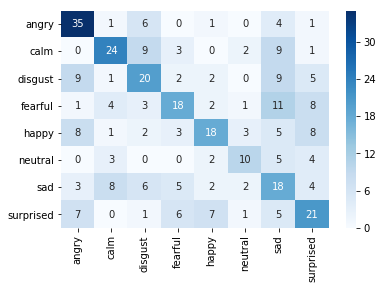

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
cm1 = confusion_matrix(actual, preds)
matrix_df1 = pd.DataFrame(cm1,index=['angry','calm','disgust','fearful','happy','neutral','sad','surprised'],columns=['angry','calm','disgust','fearful','happy','neutral','sad','surprised'])
_=sns.heatmap(matrix_df1,annot=True,fmt='g',cmap='Blues')